In [1]:
# Step 1: Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import pylab as pl
import math

In [2]:
# Step 2: Load the dataset
materna = pd.read_csv('mortalidad_materna.csv')
#materna.info()

## Question: What is the Average Age of Maternal Death within the dataset? How does this relate to the population?

### Explore the Data and Create Clean Sub-Dataframe from Analysis

In [3]:
# 1. Combine patient birthdate information into one column
birth = DataFrame(materna, columns=['Año de nacimiento', 'Mes de nacimiento', 'Día de nacimiento'])
birth = materna['Año de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str)
print(birth.sort_values(ascending=True).head(2))
len(birth)

13088    0-0-0
12833    0-0-0
dtype: object


18163

In [4]:
# 2. Combine patient date of death information into one column
death = DataFrame(materna, columns=['Año de la defunción', 'Mes de la defunción', 'Día de la defunción'])
death = materna['Año de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str)
print(death.sort_values(ascending=True).head(2))
len(death)

17886       0-0-0
17516    1914-3-3
dtype: object


18163

In [5]:
# 3. Create variable to store age fulfilled by patient and mortality reason
last_age = materna['Edad cumplida']
mortality_reason = materna['Razón de mortalidad materna']

In [6]:
# 4. Create a sub-dataframe to hold all date- information 
dates = pd.concat([birth, death, last_age, mortality_reason], axis=1)
dates.columns = ['Date of Birth', 'Date of Death', 'Age at Death', 'Reason for Mortality']
dates.head(2)

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
0,1972-7-7,2002-3-3,29,1
1,1967-4-4,2003-5-5,36,1


### Check for null or errors in Data

In [7]:
# 1. Order dates dataframe to list in ascending order of approx. age at death
dates = dates.sort_values(by=['Age at Death'],ascending=True,)
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
9598,1998-7-7,2009-7-7,11,1
6407,1996-1-1,2008-12-12,12,1
9084,2001-12-12,2014-5-5,12,1
10883,1983-11-11,2002-6-6,12,1
1266,1993-0-0,2005-1-1,12,1


In [8]:
# 6: Reset Index 
dates = dates.reset_index(drop=True)
dates.head()
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18158,0-0-0,1975-2-2,998,0
18159,0-0-0,2006-9-9,998,1
18160,0-0-0,2000-6-6,998,0
18161,0-0-0,0-0-0,998,0
18162,0-0-0,2002-4-4,998,1


In [9]:
# 7: Remove rows with NaN / '0-0-0' values in Date of Birth
dates = dates[dates['Date of Birth'] != '0-0-0']
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18134,1933-12-12,2015-8-8,81,0
18135,1933-11-11,2015-12-12,82,0
18136,1933-8-8,2015-9-9,82,0
18137,1930-1-1,2016-2-2,86,0
18138,1930-8-8,2017-1-1,86,0


In [10]:
# 8: Remove rows with 0 values in Reason for Mortality
dates = dates[dates['Reason for Mortality'] != 0 ]
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18113,1960-3-3,2010-10-10,50,1
18116,1960-1-1,2011-10-10,51,1
18121,1963-12-12,2017-10-10,53,1
18123,1961-8-8,2015-5-5,53,1
18125,1942-12-12,2002-12-12,54,1


In [11]:
# 9: Analyze new shape of data
dates.describe()

,Age at Death,Reason for Mortality
count,16636.000000,16636.0
mean,28.356756,1.0
std,7.323171,0.0
min,11.000000,1.0
25%,22.000000,1.0
50%,28.000000,1.0
75%,34.000000,1.0
max,54.000000,1.0


### Record the Mean Age of Maternal Death within a Variable and Plot Age Distribution

In [12]:
# 1. Record/calculate mean age of maternal death
mean_age = dates['Age at Death'].mean()
mean_age

28.356756431834576

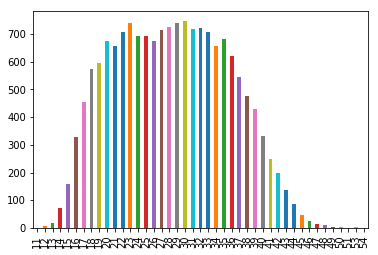

In [13]:
# 2. Plot spread of maternal death via bar graph 
dates['Age at Death'].value_counts().sort_index().plot(kind='bar')

In [14]:
# Create variable for maternal death
age_death = dates['Age at Death']

# Determine sample size for maternal death 
sample_size = len(age_death)
sample_size

16636

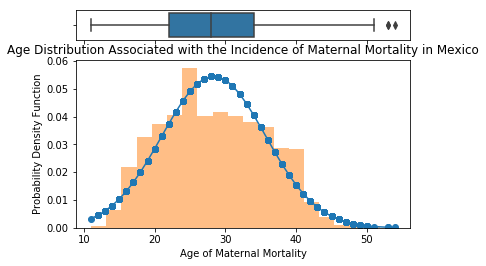

'The sample(n=16636) population mean age of maternal death is 28.36 years old with a standard deviation of 7.32.'

In [19]:


# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(age_death, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(age_death, np.mean(age_death), np.std(age_death))
pl.plot(age_death, fit, '-o')
pl.hist(age_death, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(sample_size) + ') population mean age of maternal death is ' + str(round(np.mean(age_death), 2)) + ' years old with a standard deviation of ' + str(round(np.std(age_death), 2)) + '.'


The distribution appears to be generally normally distributed based off of the histogram of the maternal age at time of death. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed.

Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ($n$) gets larger - regardless of what the shape of the population distribution. Under this theorem, $n>30$ is considered a large sample size. Since the current database sample size $n$ = 16636, CLT can be assumed.

### Create Empirical and Theoretical CDFs

In [34]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

In [33]:
# Compute the ECDF of data
x_death, y_death = ecdf(age_death)

# Seed the random number generator:
np.random.seed(15)

# Compute the theoretical CDF 
cdf_mean = np.mean(age_death)
cdf_std = np.std(age_death)
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
x_norm, y_norm = ecdf(cdf_samples)

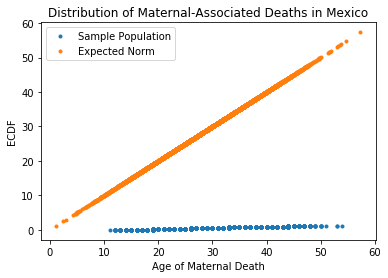

In [32]:
# Graphically visualize data

# Plot both ECDFs on same plot
fig = plt.plot(x_death, y_death, marker='.', linestyle='none')
fig = plt.plot(x_norm, x_norm, marker='.', linestyle='none')

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('ECDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico')

# Save plots
plt.show()

*Conclusion*: The datat does not appear to be normally distributed. Therefore, while this data can be analyzed, it's statistical significance is diminished.

### Statistical Testing of Data Mean

$H$o: The mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset ($28.35 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean age of death of maternal women in Mexico is *not* equal to the mean age of death presented in the dataset ($28.35 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

#### Bootstrap Simulation: Compare the Sample Mean to a Statistically-Likely Population Mean.

In [35]:
# Create a bootstrap replicate function for repeatability
def bootstrap_replicate_1d(data, func):
    """Create a bootstrap replicates."""
    
    # Create bootstrap sample
    boot_sample = np.random.choice(data, size=len(data))
    
    # Apply function to the computed bootstrap sample
    return func(boot_sample)


# Create a function to apply the bootstrap replicate function 'n' and return an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    boot_rep = np.empty(size)

    # Generate 'n' number of replicates
    for i in range(size):
        boot_rep[i] = bootstrap_replicate_1d(data, func)

    return boot_rep

In [36]:
# Create variables for sample statistical information
materna_age_std = age_death.std()
materna_sample_size = len(age_death)

# Create an array of the sample mean that is equal to the boostrap array length
materna_mean_arr = np.full(10000, mean_age)

print('sample size: ', materna_sample_size)
print('sample mean age of death: ', mean_age)
print('sample standard deviation: ', materna_age_std)

sample size:  16636
sample mean age of death:  28.356756431834576
sample standard deviation:  7.3231710220967


In [37]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(age_death, np.mean, size=10000)
print('bootstrap mean age of death: ' + str(np.mean(boot_tenthousand)))

# Compute p-value
p_val = np.sum(boot_tenthousand >= materna_mean_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_age-(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
conf_int_high = mean_age+(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))


bootstrap mean age of death: 28.356761968021157
p-value: 0.4943
95% Confidence Interval: [28.2443  28.4692]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 boostrap replicate samples was *28.3564 years of age (yoa)*, which is close to the sample mean of *28.3568 yoa* old from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *28.2443 to 28.4692 yoa* with a p-value of 0.4959, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset be accepted. **$Ho$ is accepted**.